## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
complete_df = complete_df.rename(columns={'Mouse ID': 'MouseID', 'Drug Regimen' : 'DrugRegimen', 'Weight (g)' : 'Weight', 'Tumor Volume (mm3)' : 'TumorVolume', 'Metastatic Sites' : 'MetastaticSites'})
# Display the data table for preview
complete_df.head()

,MouseID,DrugRegimen,Sex,Age_months,Weight,Timepoint,TumorVolume,MetastaticSites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(complete_df.MouseID.unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dropmice_df = complete_df.loc[complete_df.duplicated(subset=['MouseID', 'Timepoint',]),'MouseID'].unique()
print(dropmice_df)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_df[complete_df['MouseID'].isin(dropmice_df)==True]

,MouseID,DrugRegimen,Sex,Age_months,Weight,Timepoint,TumorVolume,MetastaticSites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[complete_df['MouseID'].isin(dropmice_df)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df.MouseID.unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
groupedA_df = clean_df.groupby(['DrugRegimen'])

groupedMean = groupedA_df['TumorVolume'].mean()
groupedMedian = groupedA_df['TumorVolume'].median()
groupedVariance = groupedA_df['TumorVolume'].var()
groupedStdDev = groupedA_df['TumorVolume'].std()
groupedSEM = groupedA_df['TumorVolume'].sem()

summaryStatsA = pd.DataFrame({"Mean":groupedMean, "Median":groupedMedian, "Variance":groupedVariance, "Standard Deviation":groupedStdDev, "SEM":groupedSEM})
summaryStatsA

,Mean,Median,Variance,Standard Deviation,SEM
DrugRegimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
groupedB_df = clean_df.groupby(['DrugRegimen'])
summaryStatsB = groupedB_df.agg({'TumorVolume':['mean', 'median', 'var', 'std', 'sem']})
summaryStatsB


TumorVolume                                          
                   mean     median        var       std       sem
DrugRegimen                                                      
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

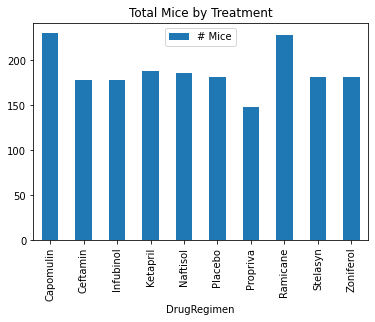

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
groupedC_df = clean_df.groupby(['DrugRegimen'])
bar_data = groupedC_df.agg({'MouseID':['count']})

bar_data.columns = ['# Mice']
bar_data.plot(kind='bar', title="Total Mice by Treatment")

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
groupedD_df = clean_df.groupby(['DrugRegimen'])
bar_dataB_df = groupedD_df.agg({'MouseID':['count']})
bar_dataB = bar_dataB_df.reset_index()
bar_dataB

,DrugRegimen,MouseID
,,count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181


<BarContainer object of 10 artists>

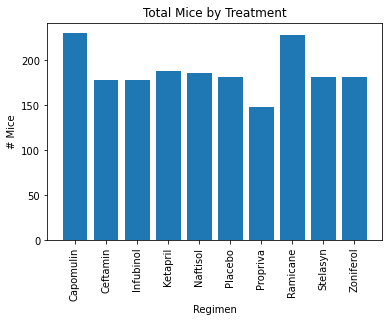

In [11]:
plt.title("Total Mice by Treatment")
plt.xlabel("Regimen")
plt.ylabel("# Mice")
plt.xticks(rotation='vertical')
plt.bar(bar_dataB['DrugRegimen'], bar_dataB['MouseID']['count'])

Male      125
Female    123
Name: Sex, dtype: int64

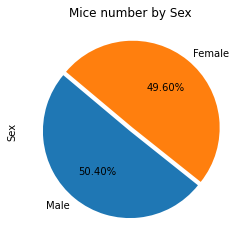

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexA_df = clean_df[['MouseID','Sex']]
sexUniqueA = sexA_df.drop_duplicates()
plotSexA = sexUniqueA['Sex'].value_counts()
plotSexA.plot(kind="pie", shadow=False, autopct="%1.2f%%", explode = (0,0.05), title="Mice number by Sex", startangle=140)
plotSexA

(-1.1043388821189521,
 1.1559884692078919,
 -1.10321604001052,
 1.1008166732185634)

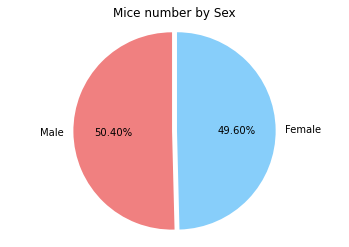

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(plotSexA, shadow=False, autopct="%1.2f%%", labels=('Male', 'Female'), explode = (0,0.05),startangle=90, colors = ["lightcoral", "lightskyblue"])
plt.title("Mice number by Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
listRegimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
reg_df = clean_df.loc[clean_df['DrugRegimen'].isin(listRegimen)]
finalTumor_df = reg_df.groupby(reg_df['MouseID']).agg({'Timepoint':['max']})
finalTumor_df = finalTumor_df.reset_index()
finalTumor_df.columns = finalTumor_df.columns.droplevel()
finalTumor_df.columns = ['MouseID', 'Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finaltumorVol = pd.merge(finalTumor_df, clean_df, how="left", on=["MouseID", "Timepoint"])

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
listRegimen

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in listRegimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumVol = finaltumorVol['TumorVolume'].loc[finaltumorVol['DrugRegimen']==x]    
    # add subset 
    tumorVol.append(tumVol)
    # Determine outliers using upper and lower bounds
    quartiles = tumVol.quantile([.25,.5,.75])
    lowerQuart=quartiles[0.25]
    upperQuart=quartiles[0.75]
    IQR = round(upperQuart-lowerQuart,2)
    lowBound = round(lowerQuart - (IQR*1.5),2)
    uppBound = round(upperQuart + (IQR*1.5),2)
    print('IQR for ' + x + ' is '+ str(IQR) +". Values below " + str(lowBound) + " or above " + str(uppBound) + " could be outliers")

IQR for Capomulin is 7.78. Values below 20.71 or above 51.83 could be outliers
IQR for Ramicane is 9.1. Values below 17.91 or above 54.31 could be outliers
IQR for Infubinol is 11.48. Values below 36.83 or above 82.75 could be outliers
IQR for Ceftamin is 15.58. Values below 25.35 or above 87.67 could be outliers


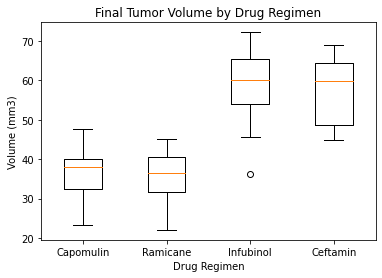

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xticklabels(listRegimen)
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumorVol)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

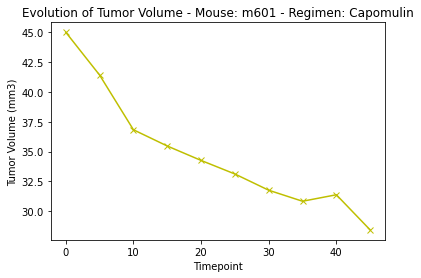

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
CapomulinMice = clean_df[['MouseID','Timepoint', 'TumorVolume']].loc[(clean_df['DrugRegimen'] == 'Capomulin')]
sampleMouse = CapomulinMice[['MouseID','Timepoint', 'TumorVolume']].loc[(CapomulinMice['MouseID'] == CapomulinMice['MouseID'][30])]
sampleMouseID = CapomulinMice['MouseID'][30]
plt.plot(sampleMouse['Timepoint'], sampleMouse['TumorVolume'], marker='x', color = 'y')
plt.title(f"Evolution of Tumor Volume - Mouse: {sampleMouseID} - Regimen: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0.5, 1.0, 'Average Tumor Volume vs. Average Mouse Weight')

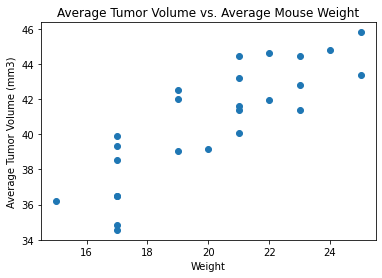

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = clean_df.loc[clean_df['DrugRegimen'] == 'Capomulin']
CapomulinWeight_df = Capomulin_df.groupby(Capomulin_df['MouseID']).agg({'TumorVolume':['mean'], 'Weight':['mean']})
CapomulinWeight_df.columns = ['AverageTumorVolume', 'Weight']
plt.scatter(CapomulinWeight_df['Weight'],CapomulinWeight_df['AverageTumorVolume'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Mouse Weight')

In [19]:
CapomulinWeight_df

,AverageTumorVolume,Weight
MouseID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


## Correlation and Regression

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.8419363424694717
The linear regression model is y = 0.95x + 21.55


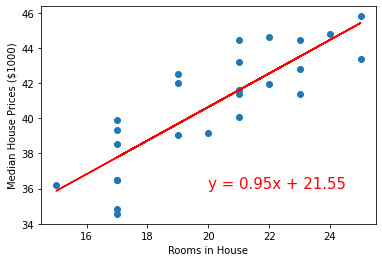

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(CapomulinWeight_df['Weight'],CapomulinWeight_df['AverageTumorVolume'])
print('The correlation coefficient between Average Tumor Volume and Mouse Weight is ' + str(corr[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CapomulinWeight_df['Weight'],CapomulinWeight_df['AverageTumorVolume'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression model is {line_eq}')

x_values= CapomulinWeight_df['Weight']
y_values=CapomulinWeight_df['AverageTumorVolume']
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()